# Emergency - 911 Calls in Montgomery County, PA

Project uses 911 call data (12/2015 - 8/2016) from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

For now, lets do some exploratory data analysis on the dataset and see what we can learn from this.



** Lets start with importing our data analysis/visualization libraries. **

In [183]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


Now, lets assign our data to the variable df_calls.

In [184]:
df_calls = pd.read_csv('911.csv')

Using some methods on the dataframe, we can get more information on the dataset and perform more operations from there.

In [185]:
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Also checking for any null values that may affect any further data analysis. Depending on how many entries and the metric that is missing values, we may choose to omit them and delete the entries from the data.

In [186]:
df_calls.isnull().sum()

lat              0
lng              0
desc             0
zip          35298
title            0
timeStamp        0
twp            103
addr             0
e                0
dtype: int64

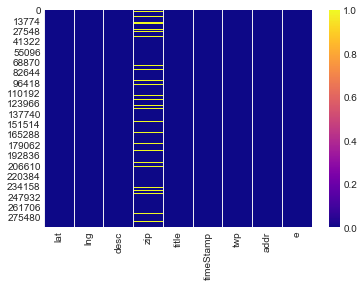

In [187]:
sns.heatmap(df_calls.isnull(),cmap = 'plasma')

There seems to be quite a few entries (over 35,000) missing from the zip column. For now, we'll ignore this and just do some analysis on the data that we currently have. We may come back to revisit this and see if we can use the information from the desc column to extract any information. Theres a few missing values for townships, but it's not enough to significantly impact the data.

Lets look at the 10 zip codes and townships that had the most calls for the given data.

** Top 10 zipcodes and townships for 911 calls. **

Text(0.5,1,'Zip Codes with Most Calls')

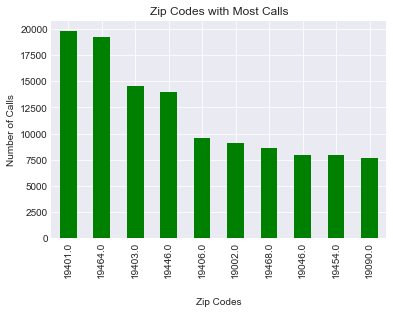

In [188]:
df_calls['zip'].value_counts().head(10).plot.bar(color = 'green')
plt.xlabel('Zip Codes',labelpad = 20)
plt.ylabel('Number of Calls')
plt.title('Zip Codes with Most Calls')

Text(0.5,1,'Townships with Most Calls')

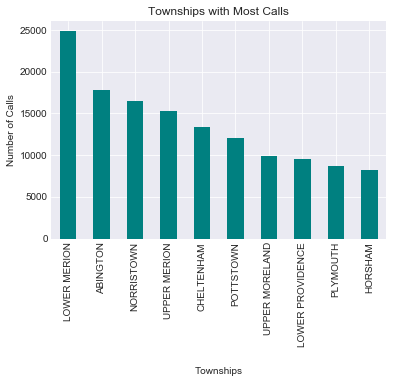

In [189]:
df_calls['twp'].value_counts().head(10).plot.bar(color = 'teal')
plt.xlabel('Townships', labelpad = 20)
plt.ylabel('Number of Calls')
plt.title('Townships with Most Calls')

Looking at the top values we can see that Lower Merion gets a majority of the calls relative to other townships. As far as zip codes go, we can see that 19401 and 19464 are similar in number of calls. Those areas are associated primarily with Norristown and Pottstown.

We can do some more analysis on the type of calls that are made to each area by simplifying the data from the title column.

In [190]:
df_calls['title'].head(3)

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
Name: title, dtype: object

Looking at the data, it seems like there is a code with the type of call and a description for the emergency associated with the call. Lets divide those entries into two new columns : Type and Emergency Description

In [191]:
#New columns that extract call info from title column to use for further analysis
df_calls['Reason'] = df_calls['title'].apply(lambda x: x.split(':')[0])
df_calls['Emergency Description'] = df_calls['title'].apply(lambda x: x.split(':')[1])

#Removes hyphen from end of values
df_calls['Emergency Description'] = df_calls['Emergency Description'].replace(' VEHICLE ACCIDENT -', ' VEHICLE ACCIDENT')
df_calls['Emergency Description'] = df_calls['Emergency Description'].replace(' DISABLED VEHICLE -', ' DISABLED VEHICLE')
df_calls['Emergency Description'] = df_calls['Emergency Description'].replace(' ROAD OBSTRUCTION -', ' ROAD OBSTRUCTION')
df_calls['Emergency Description'] = df_calls['Emergency Description'].replace(' HAZARDOUS ROAD CONDITIONS -', ' HAZARDOUS ROAD CONDITIONS')

In [192]:
df_calls['Reason'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: Reason, dtype: int64

In [195]:
df_calls['Emergency Description'].value_counts().head(30)

 VEHICLE ACCIDENT             84870
 DISABLED VEHICLE             20672
 FIRE ALARM                   16359
 RESPIRATORY EMERGENCY        14637
 FALL VICTIM                  14584
 CARDIAC EMERGENCY            14491
 ROAD OBSTRUCTION              8767
 SUBJECT IN PAIN               8151
 HEAD INJURY                   7613
 UNKNOWN MEDICAL EMERGENCY     5170
 SYNCOPAL EPISODE              5000
 SEIZURES                      4808
 GENERAL WEAKNESS              4619
 ALTERED MENTAL STATUS         4208
 ABDOMINAL PAINS               4145
 MEDICAL ALERT ALARM           4045
 FIRE INVESTIGATION            3992
 HEMORRHAGING                  3692
 OVERDOSE                      3673
 UNCONSCIOUS SUBJECT           3666
 CVA/STROKE                    3627
 NAUSEA/VOMITING               3408
 GAS-ODOR/LEAK                 3131
 BUILDING FIRE                 2770
 CARDIAC ARREST                2560
 DIABETIC EMERGENCY            2528
 HAZARDOUS ROAD CONDITIONS     2487
 DIZZINESS                  

** Plots showing distribution of Reason and Emergency Description **

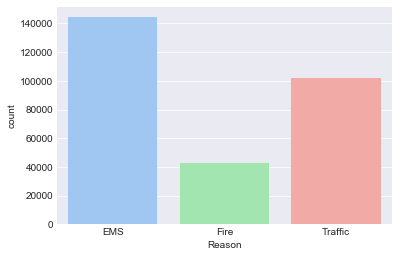

In [134]:
sns.countplot('Reason', data=df_calls, palette='pastel')

In [202]:
df_calls['Reason'].value_counts()

EMS        144362
Traffic    101889
Fire        42989
Name: Reason, dtype: int64

Text(0.5,1,'Top 20 Emergency Description Calls')

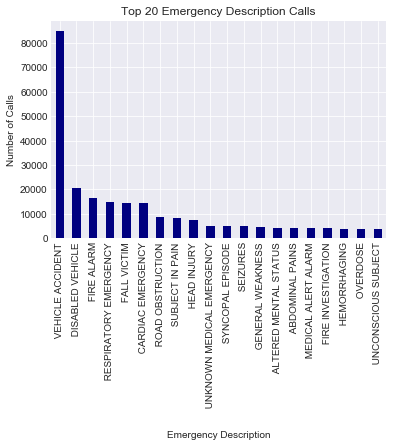

In [196]:
df_calls['Emergency Description'].value_counts().head(20).plot.bar(color = 'navy')
plt.xlabel('Emergency Description',labelpad = 20)
plt.ylabel('Number of Calls')
plt.title('Top 20 Emergency Description Calls')

Things to note:


EMS calls are more common than Traffic calls, making up about 50% of the total call, whereas Traffic calls make up only about 35%.

Vehicle accidents make up an overwhelming majority of the calls data individually. However, this does include EMS calls that have a vechicle accident description as well, which could explain why this category is so much more common than the others in the graph.


** Convert timeStamp column in dataframe from strings to DateTime objects and create new columns for further analysis **

In [137]:
df_calls['timeStamp'] = pd.to_datetime(df_calls['timeStamp'])

In [138]:
df_calls['Hour'] = df_calls['timeStamp'].apply(lambda time: time.hour)
df_calls['Month'] = df_calls['timeStamp'].apply(lambda time: time.month)
df_calls['Day of Week'] = df_calls['timeStamp'].apply(lambda time: time.dayofweek)

** Change Day of Week column from integer to string **

In [139]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_calls['Day of Week'] = df_calls['Day of Week'].map(dmap)

** Countplot of calls based on day of week and month, sorted by type of call. **

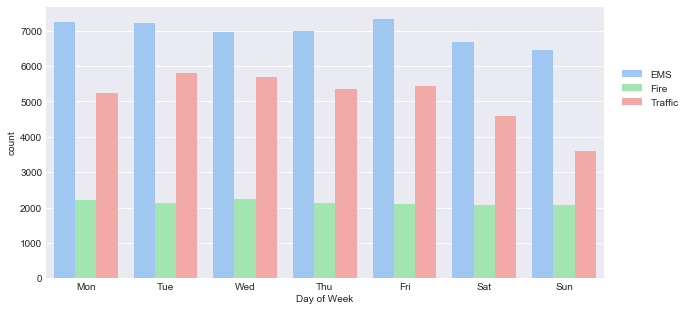

In [140]:
order = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(10,5))
sns.countplot('Day of Week', data = df_calls, hue = 'Reason', palette='pastel',order = order )
plt.legend(loc= 'upper right', bbox_to_anchor=(1.15,.8))

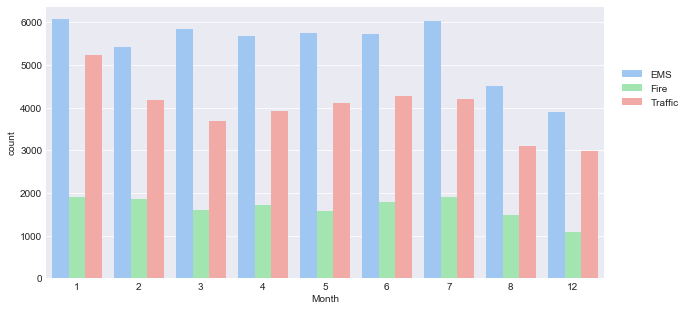

In [141]:
plt.figure(figsize=(10,5))
sns.countplot('Month', data = df_calls, hue = 'Reason', palette='pastel')
plt.legend(loc= 'upper right', bbox_to_anchor=(1.15,.8))

** Incomplete data, no data for the months of September - November which explains the odd plot **

**Further EDA by visualizing count plots of 911 calls for the months that we have data for. ** 

In [143]:
# New column which will use entire date as opposed to seperating the information like before
df_calls['Date'] = df_calls['timeStamp'].apply(lambda time:time.date())

** Plots that explore the Reason for the 911 calls throughout the months of January through September.**

<function matplotlib.pyplot.tight_layout>

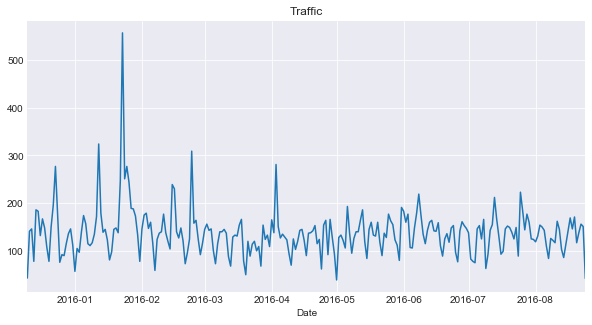

In [144]:
plt.figure(figsize=(10,5))
plt.title('Traffic')
df_calls[df_calls['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

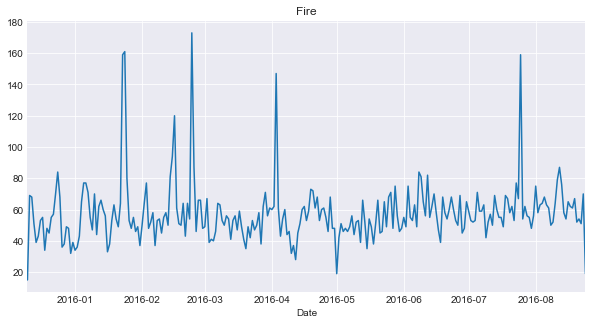

In [145]:
plt.figure(figsize=(10,5))
plt.title('Fire')
df_calls[df_calls['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

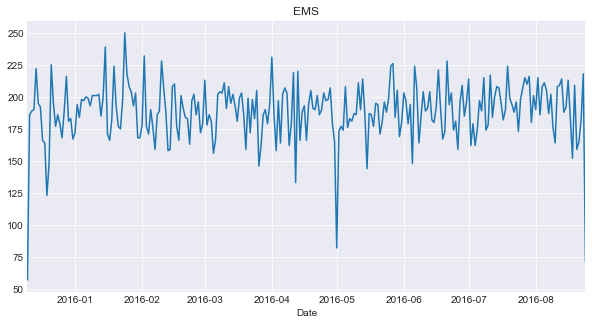

In [146]:
plt.figure(figsize=(10,5))
plt.title('EMS')
df_calls[df_calls['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout


** Heatmap to show realationship of calls between Hour and Day of Week for the data. **

In [155]:
df_heatHour = df_calls.groupby(by = ['Day of Week', 'Hour']).count()['Reason'].unstack()
df_heatHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Text(0.5,1,'Relationship of calls between Hour and DoW')

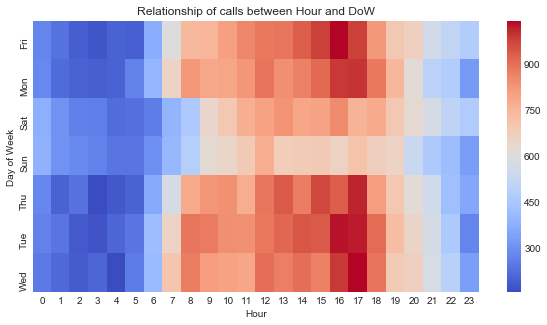

In [160]:
plt.figure(figsize=(10,5))
sns.heatmap(df_heatHour, cmap='coolwarm')
plt.title('Relationship of calls between Hour and DoW')

Text(0.5,1,'Relationship of calls between Hour and DoW')

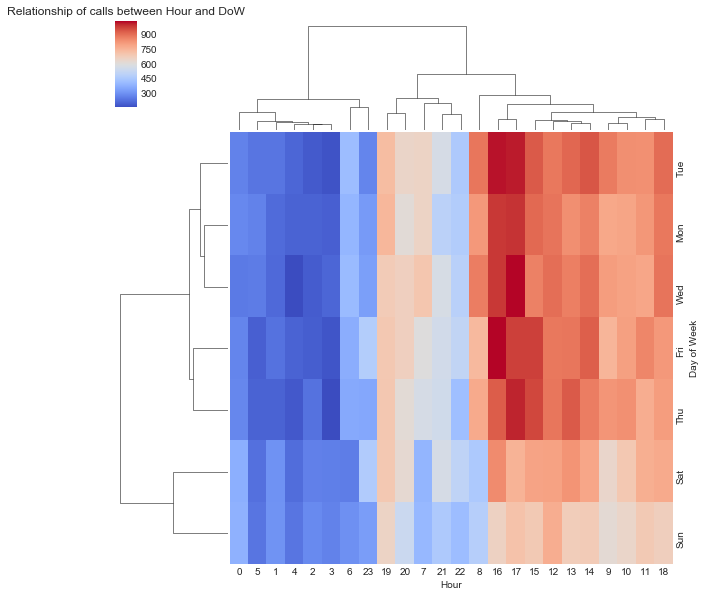

In [161]:
sns.clustermap(df_heatHour, cmap='coolwarm')
plt.title('Relationship of calls between Hour and DoW')

** Heatmap to show realationship of calls between Month and Day of Week for the data. **

In [158]:
df_heatMonth = df_calls.groupby(by = ['Day of Week', 'Month']).count()['Reason'].unstack()
df_heatMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


Text(0.5,1,'Relationship of calls between Month and DoW')

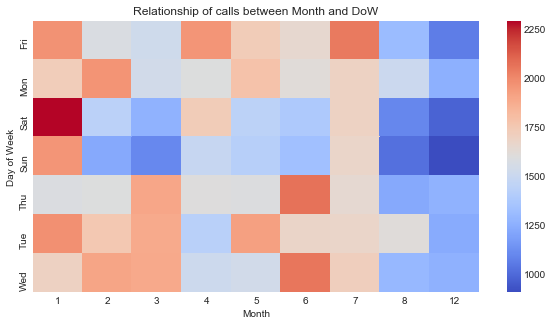

In [162]:
plt.figure(figsize=(10,5))
sns.heatmap(df_heatMonth, cmap='coolwarm')
plt.title('Relationship of calls between Month and DoW')

Text(0.5,1,'Relationship of calls between Month and DoW')

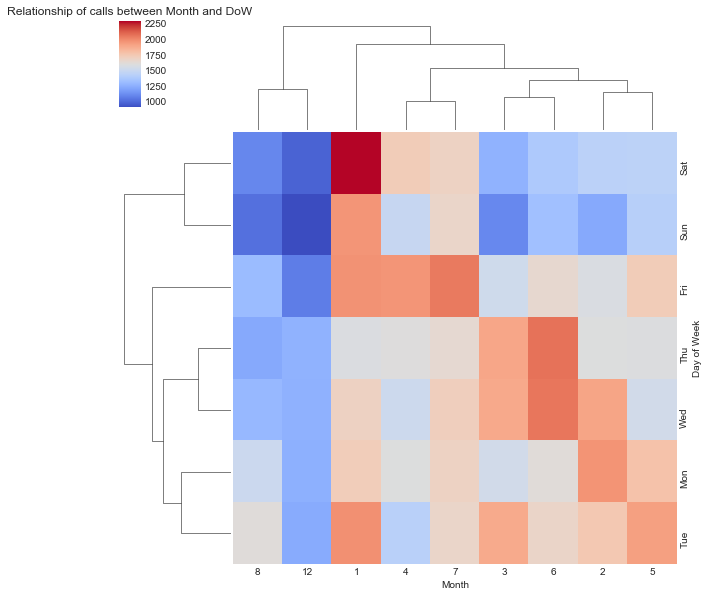

In [163]:
plt.figure(figsize=(10,5))
sns.clustermap(df_heatMonth, cmap='coolwarm')
plt.title('Relationship of calls between Month and DoW')